In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch

# 1. Import Data

In [2]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

# 2. Preprocessing

In [3]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

train_x = train_x.to_numpy().T
test_x = test_x.to_numpy().T
train_y = train_y.to_numpy().T
test_y = test_y.to_numpy().T

In [6]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[0], 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=0.005, num_iterations=5000, print_cost=True)

In [ ]:
parameters, costs = model.fit(train_x, train_y)

Cost after iteration 0: 2.8973440388904033
Cost after iteration 100: 1.3922777992502007
Cost after iteration 200: 0.8814104869924614
Cost after iteration 300: 0.718468241627548
Cost after iteration 400: 0.676400882124562
Cost after iteration 500: 0.6673062570685586
Cost after iteration 600: 0.6655076707149504
Cost after iteration 700: 0.6651272913519177
Cost after iteration 800: 0.6650152442602039
Cost after iteration 900: 0.6649751858975457
Cost after iteration 1000: 0.664946334496242
Cost after iteration 1100: 0.6649196893726891
Cost after iteration 1200: 0.6648928509018671
Cost after iteration 1300: 0.6648656901349116
Cost after iteration 1400: 0.6648381329083586
Cost after iteration 1500: 0.6648098370499568
Cost after iteration 1600: 0.664780950664969
Cost after iteration 1700: 0.6647511048823337
Cost after iteration 1800: 0.6647204273369745
Cost after iteration 1900: 0.6646888329697459
Cost after iteration 2000: 0.6646561988314001
Cost after iteration 2100: 0.6646223929132877
Cost

In [84]:
pred_train = model.predict(train_x, train_y)

RMSE: 0.24647958189994884


In [85]:
pred_test = model.predict(test_x, test_y)

RMSE: 0.24602323847530375


Text(0, 0.5, 'Cost Function')

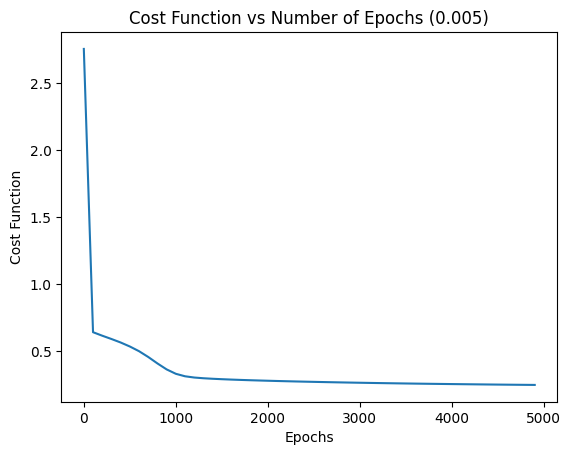

In [86]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, len(model.costs))*100, model.costs)
plt.title(f'Cost Function vs Number of Epochs ({model.learning_rate})')
plt.xlabel('Epochs')
plt.ylabel('Cost Function')

In [87]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test_y, pred_test)
mape

0.2856504197321246

In [103]:
features['AveRooms'].to_numpy().T.shape

(20640,)

In [105]:
type(target) == pd.core.frame.DataFrame

True